Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

In [1]:
# imports
from scipy.cluster.vq import vq, kmeans, whiten
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
movies = pd.read_csv('../datasets/movies_plot.csv')
fifa = pd.read_csv('../datasets/fifa3.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_pac,scaled_dri,scaled_sho,cluster_labels
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,8.704619,9.567139,6.631271,1
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,8.607901,10.204949,6.417359,1
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,8.898055,10.098647,5.989535,1
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,7.930875,9.248235,6.417359,1
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,True,8.801337,9.460838,6.417359,1


# Dominant colors in images

### Extract RGB values from image

There are broadly three steps to find the dominant colors in an image:

    Extract RGB values into three lists.
    Perform k-means clustering on scaled RGB values.
    Display the colors of cluster centers.

To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have been initialized.

For the purpose of finding dominant colors, we will be using the following image.

![batman image](../images/batman.jpg)

[from matplotlib.image Documentation](https://matplotlib.org/3.5.0/tutorials/introductory/images.html)

In [2]:
r = []
g = []
b = []

In [3]:
# Import image class of matplotlib
from matplotlib import image as img

# Read batman image and print dimensions
batman_image = img.imread('../images/batman.jpg') # changed source to images folder from local directlry.
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


### How many dominant colors?

We have loaded the following image using the imread() function of the image class of matplotlib.

![batman image](../images/batman.jpg)

The RGB values are stored in a DataFrame, `batman_df`. The RGB values have been standardized used the `whiten()` function, stored in columns, `scaled_red`, `scaled_blue` and `scaled_green`.

Construct an elbow plot with the DataFrame. How many dominant colors are present?

In [4]:
# create dataframe.
batman_df = pd.DataFrame({'red':r, 'blue':b, 'green':g})
batman_df['scaled_red'] = whiten(batman_df.red)
batman_df['scaled_blue'] = whiten(batman_df.blue)
batman_df['scaled_green'] = whiten(batman_df.green)

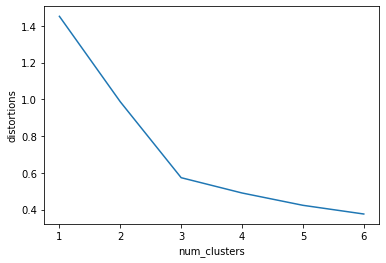

In [5]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Display dominant colors

We have loaded the following image using the `imread()` function of the `image` class of matplotlib.

![batman image](../images/batman.jpg)

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: `converted_pixel = standardized_pixel * pixel_std / 255`

The RGB values are stored in a DataFrame, `batman_df`. The scaled RGB values are stored in columns, `scaled_red`, `scaled_blue` and `scaled_green`. The cluster centers are stored in the variable cluster_centers, which were generated using the `kmeans()` function with three clusters.


In [6]:
colors = []

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


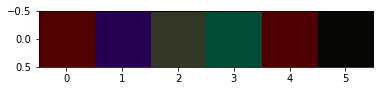

In [7]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

# Document clustering

### TF-IDF of movie plots

Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the `TfidfVectorizer` class to perform the TF-IDF of movie plots stored in the list plots. The `remove_noise()` function is available to use as a tokenizer in the `TfidfVectorizer` class. The `.fit_transform()` method fits the data into the `TfidfVectorizer` objects and then generates the TF-IDF sparse matrix.

Note: It takes a few seconds to run the `.fit_transform()` method.

[sklearn.feature_extraction.text.TfidfVectorizer Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [8]:
# This remove noise function was from chapter slides which could be derrived from:
# https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
from nltk.tokenize import word_tokenize
import re

import nltk
nltk.download('punkt')

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harrystaley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
plots = movies['Plot'].tolist()

In [10]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=remove_noise, max_df=0.75, min_df=0.1, max_features=50)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

### Top terms in movie clusters

Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the `.todense()` method to convert the sparse matrix, `tfidf_matrix` to a normal matrix for the `kmeans()` function to process. Then, use the `.get_feature_names()` method to get a list of terms in the `tfidf_vectorizer` object. The `zip()` function in Python joins two lists.

The `tfidf_vectorizer` object and sparse matrix, `tfidf_matrix`, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.

In [11]:
num_clusters = 2

# Generate cluster centers through the kmeans function
# NOTE: .dodense() convert sparse matrix to  a matrix for scipy.
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'who']
['her', 'she', 'him']


# Clustering with multiple features

### Basic checks on clusters

In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (`pac`), Dribbling (`dri`) and Shooting (`sho`) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a pandas DataFrame, `fifa`. The scaled column names are present in a list `scaled_features`. The cluster labels are stored in the `cluster_labels` column. Recall the `.count()` and `.mean()` methods in pandas help you find the number of observations and mean of observations in a DataFrame.

In [12]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0     83
1    107
2     60
Name: ID, dtype: int64
cluster_labels
0    132108.433735
1    130308.411215
2    117583.333333
Name: eur_wage, dtype: float64


### FIFA 18: what makes a complete player?

The overall level of a player in FIFA 18 is defined by six characteristics: pace (`pac`), shooting (`sho`), passing (`pas`), dribbling (`dri)`, defending (def), physical (`phy`).

Here is a sample card:

![player sample card](https://media.contentapi.ea.com/content/dam/ea/easports/fifa/features/2017/top100-ratings/10-1/fut18-top100-hazard-lg.jpg)

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a pandas DataFrame, `fifa`. features is the list of these column names and `scaled_features` is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, `vq` from `scipy.cluster.vq`, `matplotlib.pyplot` as `plt`, `seaborn` as `sns`.

Before you start the exercise, you may wish to explore `scaled_features` in the IPython Shell to check out the list of six scaled columns names.

In [13]:
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri','scaled_def', 'scaled_phy']

In [14]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)
 
# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())
 
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()
 
# Get the name column of top 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

KeyError: "['scaled_pas', 'scaled_def', 'scaled_phy'] not in index"